In [18]:
# https://github.com/ej0cl6/deep-active-learning

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, InputLayer,MaxPooling2D, BatchNormalization, Dropout,LeakyReLU
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

In [20]:
def generate_model(input_shape,class_numbers):
  model = Sequential([
      Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Flatten(),
      Dense(units=64, activation='relu'),
      Dense(units=class_numbers, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Datasets Loading


## 1- CIFAR10

In [21]:
from keras.datasets import cifar10
(X_train_cifar10, y_train_cifar10), (X_test_cifar10, y_test_cifar10) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [22]:
X_train_cifar10=X_train_cifar10.astype('float32')
X_test_cifar10=X_test_cifar10.astype('float32')
X_train_cifar10/=255
X_test_cifar10/=255

In [23]:
cifar10_model=generate_model(X_train_cifar10[0].shape,10)

## 2-Mnist

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt
from math import sqrt
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist)=mnist.load_data()
X_train_mnist=X_train_mnist[:10000]
y_train_mnist=y_train_mnist[:10000]
X_test_mnist=X_test_mnist[:1000]
y_test_mnist=y_test_mnist[:1000]
X_train_mnist=X_train_mnist.astype('float32')
X_test_mnist=X_test_mnist.astype('float32')
X_train_mnist/=255
X_test_mnist/=255
X_train_mnist=X_train_mnist.reshape(10000,28,28,1)
X_test_mnist=X_test_mnist.reshape(1000,28,28,1)

In [25]:
X_train_mnist.shape

(10000, 28, 28, 1)

In [26]:
mnist_model=generate_model(X_train_mnist[0].shape,10)

In [27]:
Y_train_mnist = np_utils.to_categorical(y_train_mnist, 10)
Y_test_mnist = np_utils.to_categorical(y_test_mnist, 10)

In [28]:
Y_train_cifar10 = np_utils.to_categorical(y_train_cifar10, 10)
Y_test_cifar10 = np_utils.to_categorical(y_test_cifar10, 10)

In [29]:
Y_test_cifar10[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Clonning the repo

In [1]:
! git clone https://github.com/ej0cl6/deep-active-learning.git

Cloning into 'deep-active-learning'...
remote: Enumerating objects: 232, done.
remote: Total 232 (delta 0), reused 0 (delta 0), pack-reused 232
Receiving objects: 100% (232/232), 44.12 KiB | 2.32 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [2]:
%cd /content/deep-active-learning

/content/deep-active-learning


In [3]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [4]:
%cat /content/deep-active-learning/data.py

import numpy as np
import torch
from torchvision import datasets

class Data:
    def __init__(self, X_train, Y_train, X_test, Y_test, handler):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.handler = handler
        
        self.n_pool = len(X_train)
        self.n_test = len(X_test)
        
        self.labeled_idxs = np.zeros(self.n_pool, dtype=bool)
        
    def initialize_labels(self, num):
        # generate initial labeled pool
        tmp_idxs = np.arange(self.n_pool)
        np.random.shuffle(tmp_idxs)
        self.labeled_idxs[tmp_idxs[:num]] = True
    
    def get_labeled_data(self):
        labeled_idxs = np.arange(self.n_pool)[self.labeled_idxs]
        return labeled_idxs, self.handler(self.X_train[labeled_idxs], self.Y_train[labeled_idxs])
    
    def get_unlabeled_data(self):
        unlabeled_idxs = np.arange(self.n_pool)[~self.labeled_idxs]
        return unlabeled_idxs, sel

In [7]:
%%writetemplate /content/deep-active-learning/data.py
import numpy as np
import torch
from torchvision import datasets


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, InputLayer,MaxPooling2D, BatchNormalization, Dropout,LeakyReLU
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from keras.datasets import cifar10,mnist



class Data:
    def __init__(self, X_train, Y_train, X_test, Y_test, handler):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.handler = handler
        
        self.n_pool = len(X_train)
        self.n_test = len(X_test)
        
        self.labeled_idxs = np.zeros(self.n_pool, dtype=bool)
        
    def initialize_labels(self, num):
        # generate initial labeled pool
        tmp_idxs = np.arange(self.n_pool)
        np.random.shuffle(tmp_idxs)
        self.labeled_idxs[tmp_idxs[:num]] = True
    
    def get_labeled_data(self):
        labeled_idxs = np.arange(self.n_pool)[self.labeled_idxs]
        return labeled_idxs, self.handler(self.X_train[labeled_idxs], self.Y_train[labeled_idxs])
    
    def get_unlabeled_data(self):
        unlabeled_idxs = np.arange(self.n_pool)[~self.labeled_idxs]
        return unlabeled_idxs, self.handler(self.X_train[unlabeled_idxs], self.Y_train[unlabeled_idxs])
    
    def get_train_data(self):
        return self.labeled_idxs.copy(), self.handler(self.X_train, self.Y_train)
        
    def get_test_data(self):
        return self.handler(self.X_test, self.Y_test)
    
    def cal_test_acc(self, preds):
        return 1.0 * (self.Y_test==preds).sum().item() / self.n_test

    
def get_MNIST(handler):
    
    raw_train = datasets.MNIST('./data/MNIST', train=True, download=True)
    raw_test = datasets.MNIST('./data/MNIST', train=False, download=True)
    class0_indices = np.where(raw_train.targets == 0)[0]
    class0_indices_to_remove = class0_indices[:3000]
    raw_train.data = np.delete(raw_train.data, class0_indices_to_remove, axis=0)
    raw_train.targets = np.delete(raw_train.targets, class0_indices_to_remove)
    return Data(raw_train.data[:40000], raw_train.targets[:40000], raw_test.data[:40000], raw_test.targets[:40000], handler)

def get_FashionMNIST(handler):
    raw_train = datasets.FashionMNIST('./data/FashionMNIST', train=True, download=True)
    raw_test = datasets.FashionMNIST('./data/FashionMNIST', train=False, download=True)
    return Data(raw_train.data[:40000], raw_train.targets[:40000], raw_test.data[:40000], raw_test.targets[:40000], handler)

def get_SVHN(handler):
    data_train = datasets.SVHN('./data/SVHN', split='train', download=True)
    data_test = datasets.SVHN('./data/SVHN', split='test', download=True)
    return Data(data_train.data[:40000], torch.from_numpy(data_train.labels)[:40000], data_test.data[:40000], torch.from_numpy(data_test.labels)[:40000], handler)

def get_CIFAR10(handler):
    data_train = datasets.CIFAR10('./data/CIFAR10', train=True, download=True)
    data_test = datasets.CIFAR10('./data/CIFAR10', train=False, download=True)
    class0_indices = np.where(data_train.targets == 0)[0]
    class0_indices_to_remove = class0_indices[:5000]
    data_train.data = np.delete(data_train.data, class0_indices_to_remove, axis=0)
    data_train.targets = np.delete(data_train.targets, class0_indices_to_remove)
    return Data(data_train.data[:40000], torch.LongTensor(data_train.targets)[:40000], data_test.data[:40000], torch.LongTensor(data_test.targets)[:40000], handler)


## *RandomSampling*

In [35]:
!python demo.py \
      --n_round 10 \
      --n_query 1000 \
      --n_init_labeled 10000 \
      --dataset_name MNIST \
      --strategy_name RandomSampling \
      --seed 1

2023-05-05 12:04:51.987309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'dataset_name': 'MNIST',
 'n_init_labeled': 10000,
 'n_query': 1000,
 'n_round': 10,
 'seed': 1,
 'strategy_name': 'RandomSampling'}

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000

Round 0
100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.73s/it]
Round 0 testing accuracy: 0.8636
Round 1
100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]
Round 1 testing accuracy: 0.866
Round 2
100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]
Round 2 testing accuracy: 0.8706
Round 3
100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.68s/it]
Round 3 testing accuracy: 0.8721
Round 4
100%|███████████████████████████████████████████████████████████████| 10/

In [36]:
!python demo.py \
      --n_round 10 \
      --n_query 1000 \
      --n_init_labeled 10000 \
      --dataset_name CIFAR10 \
      --strategy_name RandomSampling \
      --seed 1

2023-05-05 12:15:27.663990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'dataset_name': 'CIFAR10',
 'n_init_labeled': 10000,
 'n_query': 1000,
 'n_round': 10,
 'seed': 1,
 'strategy_name': 'RandomSampling'}

100% 170498071/170498071 [00:02<00:00, 70789490.40it/s]
Extracting ./data/CIFAR10/cifar-10-python.tar.gz to ./data/CIFAR10
Files already downloaded and verified
number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000

Round 0
100%|███████████████████████████████████████████████████████████████| 20/20 [01:32<00:00,  4.62s/it]
Round 0 testing accuracy: 0.5265
Round 1
100%|███████████████████████████████████████████████████████████████| 20/20 [01:40<00:00,  5.01s/it]
Round 1 testing accuracy: 0.5739
Round 2
100%|███████████████████████████████████████████████████████████████| 20/20 [01:48<00:00,  5.43s/it]
Round 2 testing accuracy: 0.5443
Round 3
100%|██████████████████████████████████████████████

## *LeastConfidence*

In [6]:
!python demo.py \
      --n_round 12 \
      --n_query 1000 \
      --n_init_labeled 10000 \
      --dataset_name MNIST \
      --strategy_name LeastConfidence \
      --seed 1

2023-05-05 14:16:40.962980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 14:16:42.381420: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'dataset_name': 'MNIST',
 'n_init_labeled': 10000,
 'n_query': 1000,
 'n_round': 12,
 'seed': 1,
 'strategy_name': 'LeastConfidence'}

100% 9912422/9912422 [00:00<00:00, 136231175.33it/s]
Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw

100% 28881/28881 [00:00<00:00, 104607680.33it/s]
Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw

100% 1648877/1648877 [00:00<00:00, 44060928.10it/s]
Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw

100% 4542/4

In [38]:
!python demo.py \
      --n_round 10 \
      --n_query 1000 \
      --n_init_labeled 10000 \
      --dataset_name CIFAR10 \
      --strategy_name LeastConfidence \
      --seed 1

2023-05-05 12:42:07.700091: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'dataset_name': 'CIFAR10',
 'n_init_labeled': 10000,
 'n_query': 1000,
 'n_round': 10,
 'seed': 1,
 'strategy_name': 'LeastConfidence'}

Files already downloaded and verified
Files already downloaded and verified
number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000

Round 0
100%|███████████████████████████████████████████████████████████████| 20/20 [01:31<00:00,  4.59s/it]
Round 0 testing accuracy: 0.5265
Round 1
100%|███████████████████████████████████████████████████████████████| 20/20 [01:40<00:00,  5.04s/it]
Round 1 testing accuracy: 0.5627
Round 2
100%|███████████████████████████████████████████████████████████████| 20/20 [01:49<00:00,  5.48s/it]
Round 2 testing accuracy: 0.5994
Round 3
100%|███████████████████████████████████████████████████████████████| 20/20 [01:58<00:00,  5.94s/it]
Round 3 testing accuracy: 0.5393
R

## *MarginSampling*

In [8]:
!python demo.py \
      --n_round 10 \
      --n_query 1000 \
      --n_init_labeled 10000 \
      --dataset_name MNIST \
      --strategy_name MarginSampling \
      --seed 1

2023-05-05 14:39:59.314739: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 14:40:00.739300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'dataset_name': 'MNIST',
 'n_init_labeled': 10000,
 'n_query': 1000,
 'n_round': 10,
 'seed': 1,
 'strategy_name': 'MarginSampling'}

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000

Round 0
100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.63s/it]
Round 0 testing accuracy: 0.9556
Round 1
100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.31s/it]
Round 1 testing accuracy: 0.9633
Round 2
100%|███████████████████████████████████████

In [40]:
!python demo.py \
      --n_round 10 \
      --n_query 1000 \
      --n_init_labeled 10000 \
      --dataset_name CIFAR10 \
      --strategy_name MarginSampling \
      --seed 1

2023-05-05 13:09:59.965163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'dataset_name': 'CIFAR10',
 'n_init_labeled': 10000,
 'n_query': 1000,
 'n_round': 10,
 'seed': 1,
 'strategy_name': 'MarginSampling'}

Files already downloaded and verified
Files already downloaded and verified
number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000

Round 0
100%|███████████████████████████████████████████████████████████████| 20/20 [01:29<00:00,  4.49s/it]
Round 0 testing accuracy: 0.5265
Round 1
100%|███████████████████████████████████████████████████████████████| 20/20 [01:38<00:00,  4.94s/it]
Round 1 testing accuracy: 0.6028
Round 2
100%|███████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.35s/it]
Round 2 testing accuracy: 0.5706
Round 3
100%|███████████████████████████████████████████████████████████████| 20/20 [02:00<00:00,  6.03s/it]
Round 3 testing accuracy: 0.5125
Ro

## *EntropySampling*

In [9]:
!python demo.py \
      --n_round 10 \
      --n_query 1000 \
      --n_init_labeled 10000 \
      --dataset_name MNIST \
      --strategy_name EntropySampling \
      --seed 1

2023-05-05 14:58:14.794577: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 14:58:16.380828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'dataset_name': 'MNIST',
 'n_init_labeled': 10000,
 'n_query': 1000,
 'n_round': 10,
 'seed': 1,
 'strategy_name': 'EntropySampling'}

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000

Round 0
100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.60s/it]
Round 0 testing accuracy: 0.9556
Round 1
100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.37s/it]
Round 1 testing accuracy: 0.9646
Round 2
100%|██████████████████████████████████████

In [42]:
!python demo.py \
      --n_round 10 \
      --n_query 1000 \
      --n_init_labeled 10000 \
      --dataset_name CIFAR10 \
      --strategy_name EntropySampling \
      --seed 1

2023-05-05 13:37:50.113435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'dataset_name': 'CIFAR10',
 'n_init_labeled': 10000,
 'n_query': 1000,
 'n_round': 10,
 'seed': 1,
 'strategy_name': 'EntropySampling'}

Files already downloaded and verified
Files already downloaded and verified
number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000

Round 0
100%|███████████████████████████████████████████████████████████████| 20/20 [01:29<00:00,  4.49s/it]
Round 0 testing accuracy: 0.5265
Round 1
100%|███████████████████████████████████████████████████████████████| 20/20 [01:38<00:00,  4.93s/it]
Round 1 testing accuracy: 0.5954
Round 2
100%|███████████████████████████████████████████████████████████████| 20/20 [01:46<00:00,  5.35s/it]
Round 2 testing accuracy: 0.5985
Round 3
100%|███████████████████████████████████████████████████████████████| 20/20 [01:56<00:00,  5.80s/it]
Round 3 testing accuracy: 0.5204
R

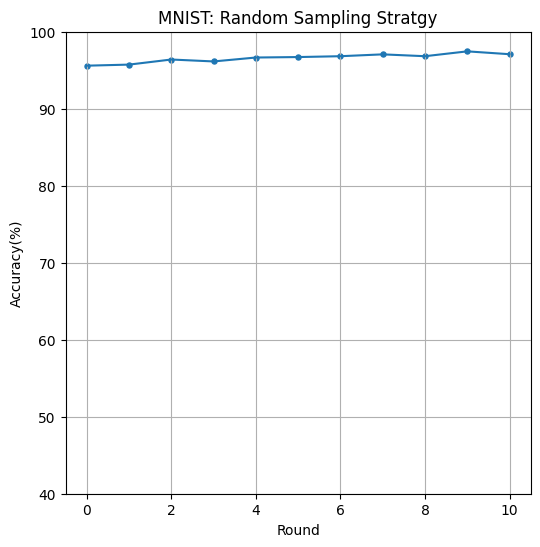

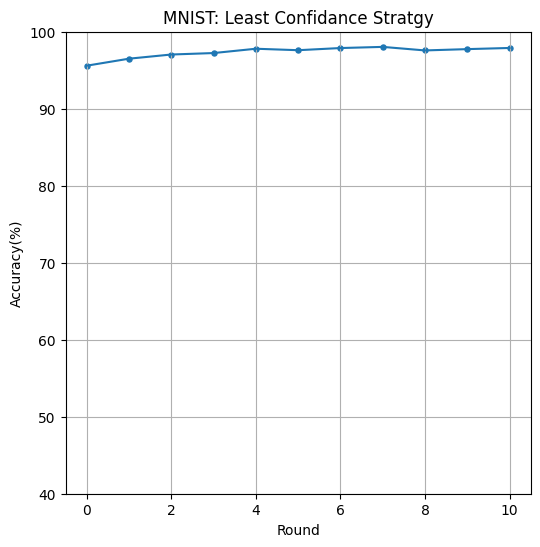

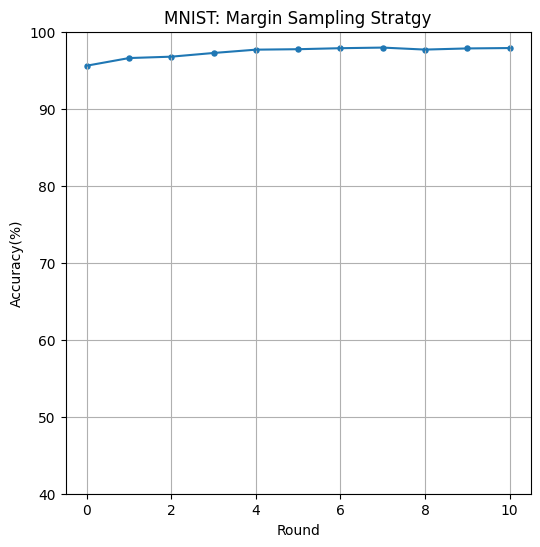

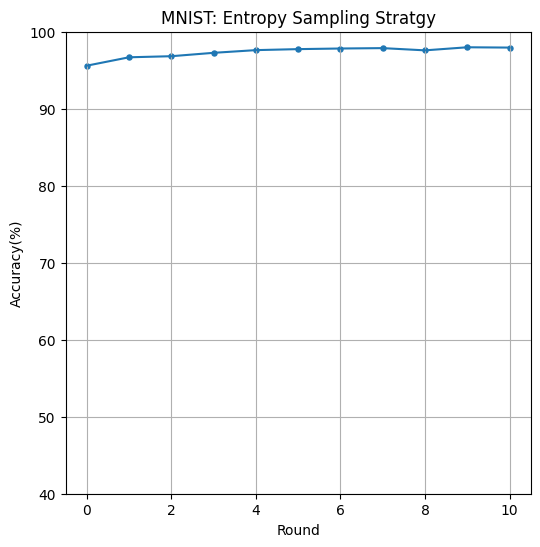

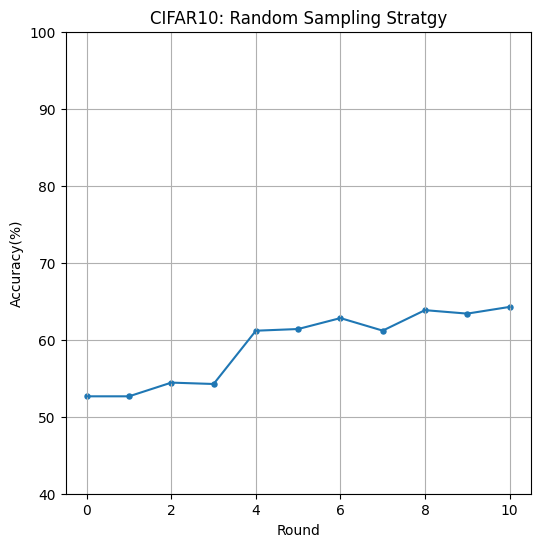

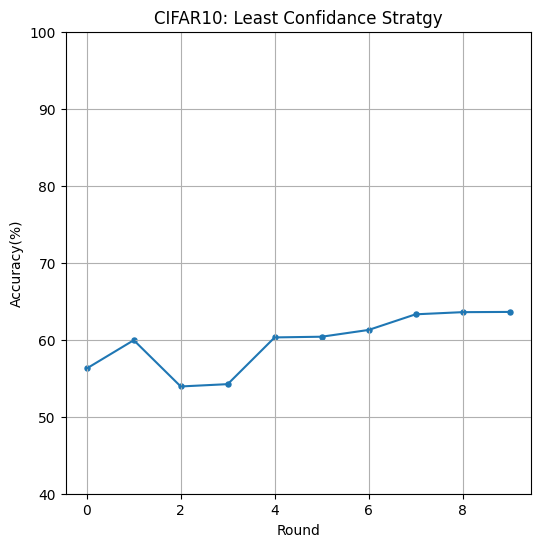

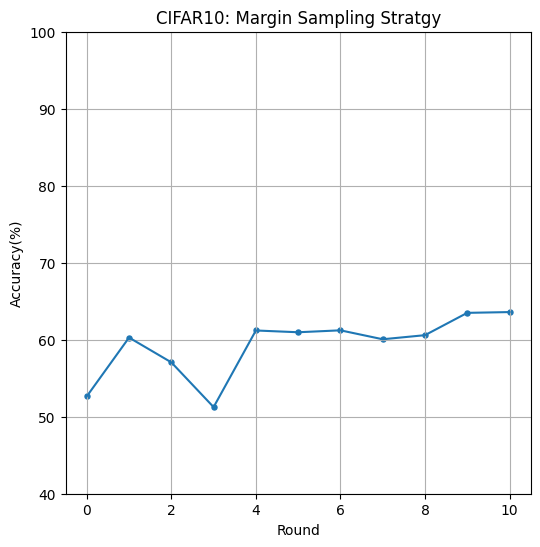

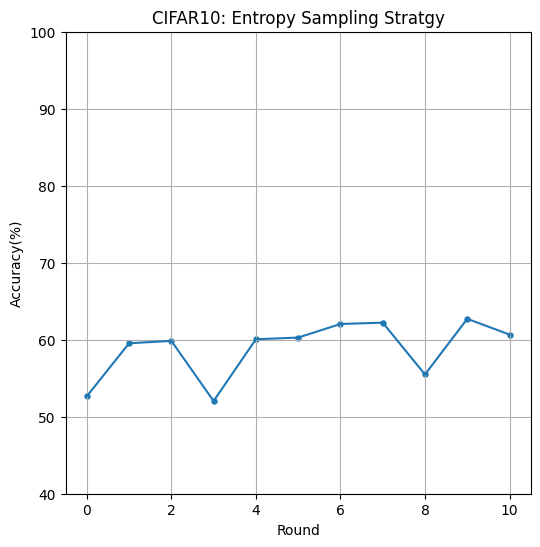

In [10]:
from matplotlib import pyplot as plt
def plot_performance(performance_history,title):
  fig, ax = plt.subplots(figsize=(6, 6))
  ax.plot(performance_history)
  ax.scatter(range(len(performance_history)), performance_history, s=13)
  ax.set_ylim(bottom=40.0, top=100.0)
  ax.grid(True)
  ax.set_title(title)
  ax.set_xlabel('Round')
  ax.set_ylabel('Accuracy(%)')
  plt.show()
MNIST={
    'MNIST: Random Sampling Stratgy':[0.9559,0.9573,0.9639,0.9614,0.9665,0.9671,0.9682,0.9706,0.9682,0.9745,0.9708],
    'MNIST: Least Confidance Stratgy':[0.9559,0.965,0.9704,0.9723,0.9779,0.976,0.9788,0.9803,0.9757,0.9774,0.9789],
    'MNIST: Margin Sampling Stratgy':[0.9559,0.9658,0.9676,0.9724,0.9767,0.9773,0.9786,0.9794,0.9768,0.9783,0.9788],
    'MNIST: Entropy Sampling Stratgy':[0.9559,0.9668,0.9682,0.9726,0.9761,0.9774,0.9782,0.9787,0.9758,0.9798,0.9794],
    }
CIFAR10={
    'CIFAR10: Random Sampling Stratgy':[0.5265, 0.5265,0.5443,0.5425,0.6117,0.6139,0.6281,0.6118,0.6384,0.6339,0.6426],
    'CIFAR10: Least Confidance Stratgy':[0.5627,0.5994,0.5393,0.5423,0.603,0.6039,0.6127,0.633,0.6358,0.6361],
    'CIFAR10: Margin Sampling Stratgy':[0.5265,0.6028,0.5706,0.5125,0.612,0.6097,0.6122,0.6006,0.6059,0.6349,0.6359],
    'CIFAR10: Entropy Sampling Stratgy':[0.5265,0.5954,0.5985,0.5204,0.6006,0.6028,0.6204,0.6222,0.5549,0.6271,0.6067],
    }
for key,vals in MNIST.items():
  plot_performance([val*100 for val in vals],key)

for key,vals in CIFAR10.items():
  plot_performance([val*100 for val in vals],key)